In [1]:
import sys
import os
import numpy as np
import gym
import Configuration.config as cfg
from gym_atena.envs.atena_env_cont import ATENAEnvCont
from Evaluation.notebook_utils import *
from live_recommender_agent import TFRecommenderAgent, find_latest_trained_model
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


Configuration loaded with:
  - humanity_coeff: 1.0
  - diversity_coeff: 2.0
  - kl_coeff: 1.5
  - compaction_coeff: 2.0
  - adam_lr: 0.0003
  - ppo_gamma: 0.995
  - ppo_lambda: 0.97
Registering ATENAcont-v0 environment
✅ Using Snorkel compatibility adapter
Configuration loaded with:
  - humanity_coeff: 1.0
  - diversity_coeff: 2.0
  - kl_coeff: 1.5
  - compaction_coeff: 2.0
  - adam_lr: 0.0003
  - ppo_gamma: 0.995
  - ppo_lambda: 0.97
✅ REWARD STABILIZER: DISABLED (stable mode like train_ipdate-1009-18:54.png)


/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <


# Evaluate ATENA Agent (TensorFlow 2)

This notebook evaluates the trained ATENA-TF agent on various datasets.


## Load Trained Model

Find and load the latest trained model from the results directory.


In [2]:
# Find latest trained model
model_path = 'results/0511-10:50/best_agent_keras3'
print(f"Using model: {model_path}")

# Or specify a specific model path:
# model_path = 'results/ppo_atena_YYYYMMDD_HHMMSS/final_model.h5'


Using model: results/0511-10:50/best_agent_keras3


## Create Environment and Agent


In [3]:
# Create environment
env = gym.make('ATENAcont-v0')
env.reset()

# Dataset to evaluate on (0-3 for flights dataset)
dataset_number = 0

# Create agent (with most_probable=True for deterministic actions)
agent = TFRecommenderAgent(
        model_path=model_path,
        dataset_number=dataset_number
)

print(f"Agent created for dataset {dataset_number}")


🔄 Loading datasets for schema: NETWORKING
































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/atena-tf 2/gym_atena/envs/atena_snorkel/snorkel_compatibility.py:122: DeprecationWarning: Please import `csr_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csr` namespace is deprecated and will be removed in SciPy 2.0.0.
  return super().find_class(module, name)
INFO:root:Computing O...
INFO:root:Estimating \mu...


✅ Datasets loaded successfully!
🔧 Fixing old snorkel.learning references in checkpoint...
✅ Successfully loaded Snorkel checkpoint with compatibility fixes
🔧 Initializing real LabelModel with checkpoint data...
   Fitting LabelModel with dummy data: L_train(100, 51), class_balance=[0.5, 0.5]


INFO:root:[0 epochs]: TRAIN:[loss=128.186]
INFO:root:[10 epochs]: TRAIN:[loss=50.380]
INFO:root:[20 epochs]: TRAIN:[loss=21.494]
INFO:root:[30 epochs]: TRAIN:[loss=6.722]
INFO:root:[40 epochs]: TRAIN:[loss=4.894]
INFO:root:[50 epochs]: TRAIN:[loss=5.299]
INFO:root:[60 epochs]: TRAIN:[loss=4.702]
INFO:root:[70 epochs]: TRAIN:[loss=4.511]
INFO:root:[80 epochs]: TRAIN:[loss=4.519]
INFO:root:[90 epochs]: TRAIN:[loss=4.502]
INFO:root:Finished Training
/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment

✅ Real LabelModel initialized and ready for predictions!
✅ Loaded Snorkel model from snorkel_checkpoints
Enhanced ATENA Environment initialized with:
  - Rule-based humanity scoring: ✓
  - Enhanced diversity rewards: ✓
  - Detailed reward tracking: ✓
  - Max steps: 12
🔧 Fixing old snorkel.learning references in checkpoint...
✅ Successfully loaded Snorkel checkpoint with compatibility fixes
🔧 Initializing real LabelModel with checkpoint data...
   Fitting LabelModel with dummy data: L_train(100, 51), class_balance=[0.5, 0.5]
✅ Real LabelModel initialized and ready for predictions!
✅ Loaded Snorkel model from snorkel_checkpoints
Enhanced ATENA Environment initialized with:
  - Rule-based humanity scoring: ✓
  - Enhanced diversity rewards: ✓
  - Detailed reward tracking: ✓
  - Max steps: 12
🎯 Initializing ParamSoftmaxPolicy (master's SUCCESS architecture - 600 channels!)
✅ Using environment parametric segments: ((), (12, 3, 26), (12,))
✅ FFParamSoftmax network built with 2 layers x 600 un

/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/core.py:171: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  return np.array(x)


✅ Networks built - Policy vars: 6, Value vars: 6
⚠️ Failed to load .weights.h5 format: A total of 3 objects could not be loaded. Example error message for object <Dense name=hidden_0, built=True>:

Layer 'hidden_0' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<Dense name=hidden_0, built=True>, <Dense name=hidden_1, built=True>, <Dense name=pre_output, built=True>]
⚠️ Failed to load .weights.h5 format: A total of 3 objects could not be loaded. Example error message for object <Dense name=v_hidden_0, built=True>:

Layer 'v_hidden_0' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<Dense name=v_hidden_0, built=True>, <Dense name=v_hidden_1, built=True>, <Dense name=value, built=True>]
⚠️ Normalizer state not found at results/0511-10:50/best_agent_keras3_normalizer.json
⚠️ Some model components couldn't be loaded.

## Run Single Episode

Run a single episode and display results.


In [4]:
# Run episode
info_hist, total_reward = run_episode(
    agent=agent,
    dataset_number=dataset_number,
    env=agent.env,
    compressed=False,
    filter_by_field=True,
    continuous_filter_term=True,
    most_probable=True,
    verbose=True
)

print(f"\nTotal Reward: {total_reward:.2f}")
print(f"Number of Steps: {len(info_hist)}")


[7]
🔄 BACK ACTION: humanity rewards only
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=0.000000
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=0.000000
🎯 Snorkel humanity: 0.000000


'Back'

[309]
🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.456, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 KL coefficient applied: 1.5
🎯 MASTER-EXACT REWARD:
   action_type: 1
   kl_distance: 1.107642432576569
   compaction_gain: 0
   total_interestingness: 1.107642432576569
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.456, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=-0.087681
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=-0.087681
🎯 Snorkel humanity: -0.087681


"Filter on Column 'highest_layer', using condition '<built-in function eq>', with term 'ICMP'"

[937]
🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 Compaction coefficient applied: 2.0
🎯 MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 0.020765532249046474
   total_interestingness: 0.020765532249046474
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=0.000000
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=0.000000
🎯 Snorkel humanity: 0.000000


"Group on Column 'packet_number' and aggregate with '<built-in function len>' on the column 'packet_number'"

[354]
🔧 Diversity coefficient applied (main calc): 2.0
🔧 KL coefficient applied: 1.5
🎯 MASTER-EXACT REWARD:
   action_type: 1
   kl_distance: 1.2263617142904655
   compaction_gain: 0
   total_interestingness: 1.2263617142904655
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=0.000000
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=0.000000
🎯 Snorkel humanity: 0.000000


"Filter on Column 'info_line', using condition '<built-in function eq>', with term 'ping'"

[0]
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.067, std=0.000
🔄 BACK ACTION: humanity rewards only
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.067, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=-0.866215
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=-0.866215
🎯 Snorkel humanity: -0.866215


'Back'

[0]
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.016, std=0.000
🔄 BACK ACTION: humanity rewards only
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.016, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=-0.968282
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=-0.968282
🎯 Snorkel humanity: -0.968282


'Back'

[327]
🔧 Diversity coefficient applied (main calc): 2.0
🔧 KL coefficient applied: 1.5
🎯 MASTER-EXACT REWARD:
   action_type: 1
   kl_distance: 1.2263617142904655
   compaction_gain: 0
   total_interestingness: 1.2263617142904655
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=0.000000
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=0.000000
🎯 Snorkel humanity: 0.000000


"Filter on Column 'info_line', using condition '<built-in function eq>', with term 'ping'"

[0]
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.067, std=0.000
🔄 BACK ACTION: humanity rewards only
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.067, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=-0.866215
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=-0.866215
🎯 Snorkel humanity: -0.866215


'Back'

[0]
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.016, std=0.000
🔄 BACK ACTION: humanity rewards only
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.016, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=-0.968282
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=-0.968282
🎯 Snorkel humanity: -0.968282


'Back'

[944]
🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 Compaction coefficient applied: 2.0
🎯 MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 1.9380038544074227
   total_interestingness: 1.9380038544074227
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=0.000000
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=0.000000
🎯 Snorkel humanity: 0.000000


"Group on Column 'length' and aggregate with '<built-in function len>' on the column 'packet_number'"

[941]
🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 Compaction coefficient applied: 2.0
🎯 MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 0.015331579369958092
   total_interestingness: 0.015331579369958092
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=0.000000
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=0.000000
🎯 Snorkel humanity: 0.000000


"Group on Column 'info_line' and aggregate with '<built-in function len>' on the column 'packet_number'"

INFO:atena_env_cont:actions:[[0, 0, 0, 0.5, 0, 0], [np.int64(1), np.int64(3), np.int64(2), np.float32(22.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(0), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(4), np.int64(1), np.float32(15.5), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(4), np.int64(0), np.float32(14.5), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(7), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(4), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(4), np.int64(0), np.float32(12.5), np.int64(0), np.int64(0)]]


[325]
🔧 Diversity coefficient applied (main calc): 2.0
🔧 KL coefficient applied: 1.5
🎯 MASTER-EXACT REWARD:
   action_type: 1
   kl_distance: 1.2263617142904655
   compaction_gain: 0
   total_interestingness: 1.2263617142904655
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=0.000000
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=0.000000
🎯 Snorkel humanity: 0.000000


"Filter on Column 'info_line', using condition '<built-in function eq>', with term 'ping'"


Total Reward: 3.45
Number of Steps: 12


## Display Session Details


In [5]:
# Display actions and rewards
simulate(info_hist, displays=True, verbose=True)


[0, 0, 0, 0.0, 0, 0],
[np.int64(1), np.int64(3), np.int64(2), np.float32(22.0), np.int64(0), np.int64(0)],
[np.int64(2), np.int64(0), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)],
[np.int64(1), np.int64(4), np.int64(1), np.float32(15.0), np.int64(0), np.int64(0)],
[np.int64(0), np.int64(0), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)],
[np.int64(0), np.int64(0), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)],
[np.int64(1), np.int64(4), np.int64(0), np.float32(14.0), np.int64(0), np.int64(0)],
[np.int64(0), np.int64(0), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)],
[np.int64(0), np.int64(0), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)],
[np.int64(2), np.int64(7), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)],
[np.int64(2), np.int64(4), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)],
[np.int64(1), np.int64(4), np.int64(0), np.float32(12.0), np.int64(0), np.int64(0)],
action: Back , reward: 0.0
raw action: [0, 0, 0, 0

,packet_number,eth_dst,eth_src,highest_layer,info_line,ip_dst,ip_src,length,sniff_timestamp,tcp_dstport,tcp_srcport,tcp_stream
0,0,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,TCP,8888?34374 [ACK] Seq=1 Ack=1 Win=65535 Len=0 T...,192.168.1.1,192.168.1.122,66,2013-06-02 10:19:14,34374,8888,0
1,1,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=256/1, ttl...",1.2.3.4,192.168.1.122,74,2013-06-02 10:19:15,-1,-1,-1
2,2,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=512/2, ttl...",82.108.24.168,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
3,3,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=768/3, ttl...",82.108.25.192,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
4,4,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=1024/4, tt...",82.108.6.189,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
8643,8643,00:0c:29:54:bf:79,00:26:b9:2b:0b:59,ICMP,"Echo (ping) reply id=0x0200, seq=33308/7298...",192.168.1.122,82.108.202.221,75,2013-06-02 10:21:14,-1,-1,-1
8644,8644,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=34332/7302...",82.108.215.38,192.168.1.122,75,2013-06-02 10:21:14,-1,-1,-1
8645,8645,00:0c:29:54:bf:79,00:26:b9:2b:0b:59,ICMP,"Echo (ping) reply id=0x0200, seq=33820/7300...",192.168.1.122,82.108.105.149,75,2013-06-02 10:21:14,-1,-1,-1
8646,8646,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=34588/7303...",82.108.105.149,192.168.1.122,75,2013-06-02 10:21:14,-1,-1,-1


action: Filter on Column 'highest_layer', using condition '<built-in function eq>', with term 'ICMP' , reward: 4.974512461710811
raw action: [np.int64(1), np.int64(3), np.int64(2), np.float32(22.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 1.107642432576569), ('kl_distance', 0.16723201924306763), ('compaction_gain', 0), ('humanity', np.float64(1.1623190049455867)), ('snorkel_humanity', np.float64(-0.08768099505441329)), ('rules_based_humanity', 0.625), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 1.107642432576569, 'compaction_gain': 0, 'information_gain': 0})])



,packet_number,eth_dst,eth_src,highest_layer,info_line,ip_dst,ip_src,length,sniff_timestamp,tcp_dstport,tcp_srcport,tcp_stream
1,1,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=256/1, ttl...",1.2.3.4,192.168.1.122,74,2013-06-02 10:19:15,-1,-1,-1
2,2,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=512/2, ttl...",82.108.24.168,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
3,3,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=768/3, ttl...",82.108.25.192,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
4,4,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=1024/4, tt...",82.108.6.189,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
5,5,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=1280/5, tt...",82.108.84.10,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
8643,8643,00:0c:29:54:bf:79,00:26:b9:2b:0b:59,ICMP,"Echo (ping) reply id=0x0200, seq=33308/7298...",192.168.1.122,82.108.202.221,75,2013-06-02 10:21:14,-1,-1,-1
8644,8644,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=34332/7302...",82.108.215.38,192.168.1.122,75,2013-06-02 10:21:14,-1,-1,-1
8645,8645,00:0c:29:54:bf:79,00:26:b9:2b:0b:59,ICMP,"Echo (ping) reply id=0x0200, seq=33820/7300...",192.168.1.122,82.108.105.149,75,2013-06-02 10:21:14,-1,-1,-1
8646,8646,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=34588/7303...",82.108.105.149,192.168.1.122,75,2013-06-02 10:21:14,-1,-1,-1


action: Group on Column 'packet_number' and aggregate with '<built-in function len>' on the column 'packet_number' , reward: -0.9584689355019069
raw action: [np.int64(2), np.int64(0), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 0.020765532249046474), ('kl_distance', 0), ('compaction_gain', 0.020765532249046474), ('humanity', np.float64(-2.0)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', -1.0), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 0.020765532249046474, 'information_gain': 0})])



,packet_number
packet_number,
1,1
2,1
3,1
4,1
5,1
...,...
8643,1
8644,1
8645,1


action: Filter on Column 'info_line', using condition '<built-in function eq>', with term 'ping' , reward: 0.2263617142904657
raw action: [np.int64(1), np.int64(4), np.int64(1), np.float32(15.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', -1.0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 1.2263617142904655), ('kl_distance', 0), ('compaction_gain', 0), ('humanity', np.float64(-1.0)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', -1.0), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 1.2263617142904655, 'compaction_gain': 0, 'information_gain': 0})])



,packet_number
packet_number,


action: Back , reward: -0.2371450918767941
raw action: [np.int64(0), np.int64(0), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 0), ('interestingness', 0), ('kl_distance', 0), ('compaction_gain', 0), ('humanity', np.float64(0.13064167833122098)), ('snorkel_humanity', np.float64(-0.8662152187472512)), ('rules_based_humanity', 0.49842844853923607), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 0.0, 'same_display_penalty': False, 'is_back_action': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 0, 'information_gain': 0})])



,packet_number
packet_number,
1,1
2,1
3,1
4,1
5,1
...,...
8643,1
8644,1
8645,1


action: Back , reward: -1.3365638797954051
raw action: [np.int64(0), np.int64(0), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 0), ('interestingness', 0), ('kl_distance', 0), ('compaction_gain', 0), ('humanity', np.float64(-0.5682819398977026)), ('snorkel_humanity', np.float64(-0.9682819398977026)), ('rules_based_humanity', 0.2), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 0.0, 'same_display_penalty': False, 'is_back_action': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 0, 'information_gain': 0})])



,packet_number,eth_dst,eth_src,highest_layer,info_line,ip_dst,ip_src,length,sniff_timestamp,tcp_dstport,tcp_srcport,tcp_stream
1,1,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=256/1, ttl...",1.2.3.4,192.168.1.122,74,2013-06-02 10:19:15,-1,-1,-1
2,2,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=512/2, ttl...",82.108.24.168,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
3,3,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=768/3, ttl...",82.108.25.192,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
4,4,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=1024/4, tt...",82.108.6.189,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
5,5,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=1280/5, tt...",82.108.84.10,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
8643,8643,00:0c:29:54:bf:79,00:26:b9:2b:0b:59,ICMP,"Echo (ping) reply id=0x0200, seq=33308/7298...",192.168.1.122,82.108.202.221,75,2013-06-02 10:21:14,-1,-1,-1
8644,8644,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=34332/7302...",82.108.215.38,192.168.1.122,75,2013-06-02 10:21:14,-1,-1,-1
8645,8645,00:0c:29:54:bf:79,00:26:b9:2b:0b:59,ICMP,"Echo (ping) reply id=0x0200, seq=33820/7300...",192.168.1.122,82.108.105.149,75,2013-06-02 10:21:14,-1,-1,-1
8646,8646,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=34588/7303...",82.108.105.149,192.168.1.122,75,2013-06-02 10:21:14,-1,-1,-1


action: Filter on Column 'info_line', using condition '<built-in function eq>', with term 'ping' , reward: 0.2263617142904657
raw action: [np.int64(1), np.int64(4), np.int64(0), np.float32(14.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', -1.0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 1.2263617142904655), ('kl_distance', 0), ('compaction_gain', 0), ('humanity', np.float64(-1.0)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', -1.0), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 1.2263617142904655, 'compaction_gain': 0, 'information_gain': 0})])



,packet_number,eth_dst,eth_src,highest_layer,info_line,ip_dst,ip_src,length,sniff_timestamp,tcp_dstport,tcp_srcport,tcp_stream


action: Back , reward: -0.2371450918767941
raw action: [np.int64(0), np.int64(0), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 0), ('interestingness', 0), ('kl_distance', 0), ('compaction_gain', 0), ('humanity', np.float64(0.13064167833122098)), ('snorkel_humanity', np.float64(-0.8662152187472512)), ('rules_based_humanity', 0.49842844853923607), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 0.0, 'same_display_penalty': False, 'is_back_action': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 0, 'information_gain': 0})])



,packet_number,eth_dst,eth_src,highest_layer,info_line,ip_dst,ip_src,length,sniff_timestamp,tcp_dstport,tcp_srcport,tcp_stream
1,1,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=256/1, ttl...",1.2.3.4,192.168.1.122,74,2013-06-02 10:19:15,-1,-1,-1
2,2,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=512/2, ttl...",82.108.24.168,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
3,3,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=768/3, ttl...",82.108.25.192,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
4,4,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=1024/4, tt...",82.108.6.189,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
5,5,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=1280/5, tt...",82.108.84.10,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
8643,8643,00:0c:29:54:bf:79,00:26:b9:2b:0b:59,ICMP,"Echo (ping) reply id=0x0200, seq=33308/7298...",192.168.1.122,82.108.202.221,75,2013-06-02 10:21:14,-1,-1,-1
8644,8644,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=34332/7302...",82.108.215.38,192.168.1.122,75,2013-06-02 10:21:14,-1,-1,-1
8645,8645,00:0c:29:54:bf:79,00:26:b9:2b:0b:59,ICMP,"Echo (ping) reply id=0x0200, seq=33820/7300...",192.168.1.122,82.108.105.149,75,2013-06-02 10:21:14,-1,-1,-1
8646,8646,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=34588/7303...",82.108.105.149,192.168.1.122,75,2013-06-02 10:21:14,-1,-1,-1


action: Back , reward: -1.3365638797954051
raw action: [np.int64(0), np.int64(0), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 0), ('interestingness', 0), ('kl_distance', 0), ('compaction_gain', 0), ('humanity', np.float64(-0.5682819398977026)), ('snorkel_humanity', np.float64(-0.9682819398977026)), ('rules_based_humanity', 0.2), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 0.0, 'same_display_penalty': False, 'is_back_action': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 0, 'information_gain': 0})])



,packet_number,eth_dst,eth_src,highest_layer,info_line,ip_dst,ip_src,length,sniff_timestamp,tcp_dstport,tcp_srcport,tcp_stream
0,0,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,TCP,8888?34374 [ACK] Seq=1 Ack=1 Win=65535 Len=0 T...,192.168.1.1,192.168.1.122,66,2013-06-02 10:19:14,34374,8888,0
1,1,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=256/1, ttl...",1.2.3.4,192.168.1.122,74,2013-06-02 10:19:15,-1,-1,-1
2,2,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=512/2, ttl...",82.108.24.168,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
3,3,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=768/3, ttl...",82.108.25.192,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
4,4,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=1024/4, tt...",82.108.6.189,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
8643,8643,00:0c:29:54:bf:79,00:26:b9:2b:0b:59,ICMP,"Echo (ping) reply id=0x0200, seq=33308/7298...",192.168.1.122,82.108.202.221,75,2013-06-02 10:21:14,-1,-1,-1
8644,8644,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=34332/7302...",82.108.215.38,192.168.1.122,75,2013-06-02 10:21:14,-1,-1,-1
8645,8645,00:0c:29:54:bf:79,00:26:b9:2b:0b:59,ICMP,"Echo (ping) reply id=0x0200, seq=33820/7300...",192.168.1.122,82.108.105.149,75,2013-06-02 10:21:14,-1,-1,-1
8646,8646,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=34588/7303...",82.108.105.149,192.168.1.122,75,2013-06-02 10:21:14,-1,-1,-1


action: Group on Column 'length' and aggregate with '<built-in function len>' on the column 'packet_number' , reward: 2.8760077088148455
raw action: [np.int64(2), np.int64(7), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 1.9380038544074227), ('kl_distance', 0), ('compaction_gain', 1.9380038544074227), ('humanity', np.float64(-2.0)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', -1.0), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 1.9380038544074227, 'information_gain': 0})])



,packet_number
length,
42,2
54,434
60,2
62,532
66,1
70,41
74,1
75,7599
94,2


action: Group on Column 'info_line' and aggregate with '<built-in function len>' on the column 'packet_number' , reward: -0.969336841260084
raw action: [np.int64(2), np.int64(4), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 0.015331579369958092), ('kl_distance', 0), ('compaction_gain', 0.015331579369958093), ('humanity', np.float64(-2.0)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', -1.0), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 0.015331579369958092, 'information_gain': 0})])



packet_number
length info_line                                                        
42     Who has 192.168.1.122?  Tell 192.168.1.1                        2
54     139 > 1054 [RST, ACK] Seq=1 Ack=1 Win=0 Len=0                   3
       139 > 1055 [RST, ACK] Seq=1 Ack=1 Win=0 Len=0                   3
       139 > 1056 [RST, ACK] Seq=1 Ack=1 Win=0 Len=0                   3
       139 > 1057 [RST, ACK] Seq=1 Ack=1 Win=0 Len=0                   3
...                                                                  ...
75     Echo (ping) request  id=0x0200, seq=9997/3367, ...              1
       Echo (ping) request  id=0x0200, seq=9998/3623, ...              1
       Echo (ping) request  id=0x0200, seq=9999/3879, ...              1
94     Time-to-live exceeded (Time to live exceeded in...              2
103    Destination unreachable (Host unreachable)                     34

[8151 rows x 1 columns]

action: Filter on Column 'info_line', using condition '<built-in function eq>', with term 'ping' , reward: 0.2263617142904657
raw action: [np.int64(1), np.int64(4), np.int64(0), np.float32(12.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', -1.0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 1.2263617142904655), ('kl_distance', 0), ('compaction_gain', 0), ('humanity', np.float64(-1.0)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', -1.0), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 1.2263617142904655, 'compaction_gain': 0, 'information_gain': 0})])



,,packet_number
length,info_line,


Total Reward: 3.4543815932906634


## Analyze Rewards


In [6]:
# Analyze reward components
summary_reward_data = {
    'total_reward': [],
    'avg_reward_per_action': [],
    'avg_reward_per_non_back_action': [],
    'num_of_actions': []
}

actions_lst = info_hist_to_raw_actions_lst(info_hist)
reward_df = analyze_reward(info_hist, actions_lst, summary_reward_data, verbose=True)


,action,empty_display,empty_groupings,same_display_seen_already,back,diversity,interestingness,kl_distance,compaction_gain,humanity,snorkel_humanity,rules_based_humanity,human_sessions_similarity,coherency_score,readability_score,diversity_components,interestingness_components,total_reward,action_info
0,"[0, 0, 0, -0.5, 0, 0]",0.0,0,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,"{'display_distance': 0.0, 'same_display_penalt...","{'kl_divergence': 0, 'compaction_gain': 0, 'in...",0.000000,Back
1,"[1, 3, 2, 21.5, 0, 0]",0.0,0,0,0,2.0,1.107642,0.167232,0.000000,1.162319,-0.087681,0.625000,0,0,0,"{'display_distance': 1.0, 'same_display_penalt...","{'kl_divergence': 1.107642432576569, 'compacti...",4.974512,"Filter on Column 'highest_layer', using condit..."
2,"[2, 0, 0, -0.5, 0, 0]",0.0,0,0,0,2.0,0.020766,0.000000,0.020766,-2.000000,0.000000,-1.000000,0,0,0,"{'display_distance': 1.0, 'same_display_penalt...","{'kl_divergence': 0, 'compaction_gain': 0.0207...",-0.958469,Group on Column 'packet_number' and aggregate ...
3,"[1, 4, 1, 14.5, 0, 0]",-1.0,0,0,0,2.0,1.226362,0.000000,0.000000,-1.000000,0.000000,-1.000000,0,0,0,"{'display_distance': 1.0, 'same_display_penalt...","{'kl_divergence': 1.2263617142904655, 'compact...",0.226362,"Filter on Column 'info_line', using condition ..."
4,"[0, 0, 0, -0.5, 0, 0]",0.0,0,0,0,0.0,0.000000,0.000000,0.000000,0.130642,-0.866215,0.498428,0,0,0,"{'display_distance': 0.0, 'same_display_penalt...","{'kl_divergence': 0, 'compaction_gain': 0, 'in...",-0.237145,Back
5,"[0, 0, 0, -0.5, 0, 0]",0.0,0,0,0,0.0,0.000000,0.000000,0.000000,-0.568282,-0.968282,0.200000,0,0,0,"{'display_distance': 0.0, 'same_display_penalt...","{'kl_divergence': 0, 'compaction_gain': 0, 'in...",-1.336564,Back
6,"[1, 4, 0, 13.5, 0, 0]",-1.0,0,0,0,2.0,1.226362,0.000000,0.000000,-1.000000,0.000000,-1.000000,0,0,0,"{'display_distance': 1.0, 'same_display_penalt...","{'kl_divergence': 1.2263617142904655, 'compact...",0.226362,"Filter on Column 'info_line', using condition ..."
7,"[0, 0, 0, -0.5, 0, 0]",0.0,0,0,0,0.0,0.000000,0.000000,0.000000,0.130642,-0.866215,0.498428,0,0,0,"{'display_distance': 0.0, 'same_display_penalt...","{'kl_divergence': 0, 'compaction_gain': 0, 'in...",-0.237145,Back
8,"[0, 0, 0, -0.5, 0, 0]",0.0,0,0,0,0.0,0.000000,0.000000,0.000000,-0.568282,-0.968282,0.200000,0,0,0,"{'display_distance': 0.0, 'same_display_penalt...","{'kl_divergence': 0, 'compaction_gain': 0, 'in...",-1.336564,Back
9,"[2, 7, 0, -0.5, 0, 0]",0.0,0,0,0,2.0,1.938004,0.000000,1.938004,-2.000000,0.000000,-1.000000,0,0,0,"{'display_distance': 1.0, 'same_display_penalt...","{'kl_divergence': 0, 'compaction_gain': 1.9380...",2.876008,Group on Column 'length' and aggregate with '<...


## Evaluate on Multiple Datasets

Run the agent on all available datasets and compare performance.


In [7]:
# Evaluate on all datasets
results = []

for dataset_num in range(4):  # 0-3 for flights
    print(f"\n{'='*60}")
    print(f"Evaluating on Dataset {dataset_num}")
    print(f"{'='*60}\n")
    
    # Create fresh agent for this dataset
    test_agent = TFRecommenderAgent(
        model_path=model_path,
        dataset_number=dataset_number
    )
    
    # Run episode
    info_hist, total_reward = run_episode(
        agent=test_agent,
        dataset_number=dataset_num,
        env=test_agent.env,
        most_probable=True,
        verbose=False
    )
    
    results.append({
        'dataset': dataset_num,
        'total_reward': total_reward,
        'num_steps': len(info_hist),
        'avg_reward': total_reward / len(info_hist) if len(info_hist) > 0 else 0
    })
    
    print(f"Total Reward: {total_reward:.2f}")
    print(f"Steps: {len(info_hist)}")
    print(f"Avg Reward per Step: {total_reward / len(info_hist):.2f}")

# Display summary
import pandas as pd
results_df = pd.DataFrame(results)
print("\n\nSummary:")
display(results_df)


/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/atena-tf 2/gym_atena/envs/atena_snorkel/snorkel_compatibility.py:122: DeprecationWarning: Please import `csr_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csr` namespace is deprecated and will be removed in SciPy 2.0.0.
  return super().find_class(module, name)
INFO:root:Computing O...
INFO:root:Estimating \mu...
INFO:root:[0 epochs]: TRAIN:[loss=121.786]
INFO:root:[10 epochs]: TRAIN:[loss=46.488]
INFO:root:[20 epochs]: TRAIN:[loss=21.261]



Evaluating on Dataset 0

🔧 Fixing old snorkel.learning references in checkpoint...
✅ Successfully loaded Snorkel checkpoint with compatibility fixes
🔧 Initializing real LabelModel with checkpoint data...
   Fitting LabelModel with dummy data: L_train(100, 51), class_balance=[0.5, 0.5]


INFO:root:[30 epochs]: TRAIN:[loss=8.068]
INFO:root:[40 epochs]: TRAIN:[loss=4.734]
INFO:root:[50 epochs]: TRAIN:[loss=5.083]
INFO:root:[60 epochs]: TRAIN:[loss=4.938]
INFO:root:[70 epochs]: TRAIN:[loss=4.710]
INFO:root:[80 epochs]: TRAIN:[loss=4.672]
INFO:root:[90 epochs]: TRAIN:[loss=4.673]
INFO:root:Finished Training


✅ Real LabelModel initialized and ready for predictions!
✅ Loaded Snorkel model from snorkel_checkpoints
Enhanced ATENA Environment initialized with:
  - Rule-based humanity scoring: ✓
  - Enhanced diversity rewards: ✓
  - Detailed reward tracking: ✓
  - Max steps: 12
🎯 Initializing ParamSoftmaxPolicy (master's SUCCESS architecture - 600 channels!)
✅ Using environment parametric segments: ((), (12, 3, 26), (12,))
✅ FFParamSoftmax network built with 2 layers x 600 units
🎯 FFParamSoftmax Policy initialized:
  - Hidden channels: 600 (master's 600)
  - Parametric segments: ((), (12, 3, 26), (12,))
  - Pre-output size: 56
  - Beta (temperature): 1.0
🏗️  Building networks...
✅ Networks built - Policy vars: 6, Value vars: 6
⚠️ Failed to load .weights.h5 format: A total of 3 objects could not be loaded. Example error message for object <Dense name=hidden_0, built=True>:

Layer 'hidden_0' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of object

/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/core.py:171: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  return np.array(x)


🔄 BACK ACTION: humanity rewards only
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=0.000000
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=0.000000
🎯 Snorkel humanity: 0.000000


🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.002, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 KL coefficient applied: 1.5
🎯 MASTER-EXACT REWARD:
   action_type: 1
   kl_distance: 1.107642432576569
   compaction_gain: 0
   total_interestingness: 1.107642432576569
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.002, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=-0.995740
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=-0.995740
🎯 Snorkel humanity: -0.995740
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.002, std=0.000
🔄 BACK ACTION: humanity rewards only
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.002, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=-0.995976
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_hum

INFO:atena_env_cont:actions:[[0, 0, 0, 0.5, 0, 0], [np.int64(1), np.int64(3), np.int64(2), np.float32(22.5), np.int64(0), np.int64(0)], [0, 0, 0, 0.5, 0, 0], [np.int64(1), np.int64(1), np.int64(0), np.float32(5.5), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(2), np.int64(2), np.float32(23.5), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(8), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(5), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(6), np.int64(0), np.float32(18.5), np.int64(0), np.int64(0)]]
/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/pyth


🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 KL coefficient applied: 1.5
🎯 MASTER-EXACT REWARD:
   action_type: 1
   kl_distance: 0.3659250100912534
   compaction_gain: 0
   total_interestingness: 0.3659250100912534
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=0.000000
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=0.000000
🎯 Snorkel humanity: 0.000000
Total Reward: -21.23
Steps: 12
Avg Reward per Step: -1.77

Evaluating on Dataset 1

🔧 Fixing old snorkel.learning references in checkpoint...
✅ Successfully loaded Snorkel checkpoint with compatibility fixes
🔧 Initializing real LabelModel with checkpoint data...
   Fitting LabelModel with dummy data: L_train(100, 51), class_balance=[0.5, 0.5]
✅ Real LabelModel initialized and ready for predictions!
✅ Loade

/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/core.py:171: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  return np.array(x)


⚠️ Failed to load .weights.h5 format: A total of 3 objects could not be loaded. Example error message for object <Dense name=v_hidden_0, built=True>:

Layer 'v_hidden_0' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<Dense name=v_hidden_0, built=True>, <Dense name=v_hidden_1, built=True>, <Dense name=value, built=True>]
⚠️ Normalizer state not found at results/0511-10:50/best_agent_keras3_normalizer.json
⚠️ Some model components couldn't be loaded. Consider retraining for Keras 3.
⚠️ No compatible trained model found at results/0511-10:50/best_agent_keras3
   Using untrained model for demonstration
   💡 Consider retraining the model for Keras 3 compatibility
🤖 TF Recommender Agent initialized:
   Schema: NETWORKING
   Dataset: 0
   Observation dim: 51
   Action dim: 6
🔄 BACK ACTION: humanity rewards only
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.5

INFO:atena_env_cont:actions:[[0, 0, 0, 0.5, 0, 0], [np.int64(1), np.int64(3), np.int64(2), np.float32(22.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(1), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [0, 0, 0, 0.5, 0, 0], [np.int64(0), np.int64(0), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(3), np.int64(2), np.float32(24.5), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(8), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(4), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(4), np.int64(0), np.float32(22.5), np.int64(0), np.int64(0)]]
/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/pyth

🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 Compaction coefficient applied: 2.0
🎯 MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 1.74641119928678
   total_interestingness: 1.74641119928678
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=0.000000
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=0.000000
🎯 Snorkel humanity: 0.000000
🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 Compaction coefficient applied: 2.0
🎯 MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 0.1273661409513192
   total_interestin

/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/core.py:171: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  return np.array(x)


✅ Networks built - Policy vars: 6, Value vars: 6
⚠️ Failed to load .weights.h5 format: A total of 3 objects could not be loaded. Example error message for object <Dense name=hidden_0, built=True>:

Layer 'hidden_0' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<Dense name=hidden_0, built=True>, <Dense name=hidden_1, built=True>, <Dense name=pre_output, built=True>]
⚠️ Failed to load .weights.h5 format: A total of 3 objects could not be loaded. Example error message for object <Dense name=v_hidden_0, built=True>:

Layer 'v_hidden_0' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<Dense name=v_hidden_0, built=True>, <Dense name=v_hidden_1, built=True>, <Dense name=value, built=True>]
⚠️ Normalizer state not found at results/0511-10:50/best_agent_keras3_normalizer.json
⚠️ Some model components couldn't be loaded.

INFO:atena_env_cont:actions:[[0, 0, 0, 0.5, 0, 0], [np.int64(1), np.int64(3), np.int64(2), np.float32(22.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(0), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(5), np.int64(0), np.float32(9.5), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(5), np.int64(2), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(9), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(4), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [0, 0, 0, 0.5, 0, 0]]
/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python

🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.005, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 Compaction coefficient applied: 2.0
🎯 MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 1.570618214152881
   total_interestingness: 1.570618214152881
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.005, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=-0.990959
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=-0.990959
🎯 Snorkel humanity: -0.990959
🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 Compaction coefficient applied: 2.0
🎯 MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 0.06874008410393873
   total_inte

/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/core.py:171: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  return np.array(x)


🏗️  Building networks...
✅ Networks built - Policy vars: 6, Value vars: 6
⚠️ Failed to load .weights.h5 format: A total of 3 objects could not be loaded. Example error message for object <Dense name=hidden_0, built=True>:

Layer 'hidden_0' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<Dense name=hidden_0, built=True>, <Dense name=hidden_1, built=True>, <Dense name=pre_output, built=True>]
⚠️ Failed to load .weights.h5 format: A total of 3 objects could not be loaded. Example error message for object <Dense name=v_hidden_0, built=True>:

Layer 'v_hidden_0' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<Dense name=v_hidden_0, built=True>, <Dense name=v_hidden_1, built=True>, <Dense name=value, built=True>]
⚠️ Normalizer state not found at results/0511-10:50/best_agent_keras3_normalizer.json
⚠️ Some model compo

INFO:atena_env_cont:actions:[[0, 0, 0, 0.5, 0, 0], [np.int64(1), np.int64(3), np.int64(2), np.float32(22.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(9), np.int64(2), np.float32(25.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(5), np.int64(1), np.float32(3.5), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(3), np.int64(2), np.float32(19.5), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(7), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(5), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(3), np.int64(2), np.float32(11.5), np.int64(0), np.int64(0)]]


🔧 Diversity coefficient applied (main calc): 2.0
🚨 MASTER-EXACT: Skipping interestingness & humanity due to same display penalty
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=0.000000
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=0.000000
🎯 Snorkel humanity: 0.000000
Total Reward: 11.49
Steps: 12
Avg Reward per Step: 0.96


Summary:


,dataset,total_reward,num_steps,avg_reward
0,0,-21.227078,12,-1.768923
1,1,-3.773410,12,-0.314451
2,2,-12.192089,12,-1.016007
3,3,11.492178,12,0.957682


## Plot Results


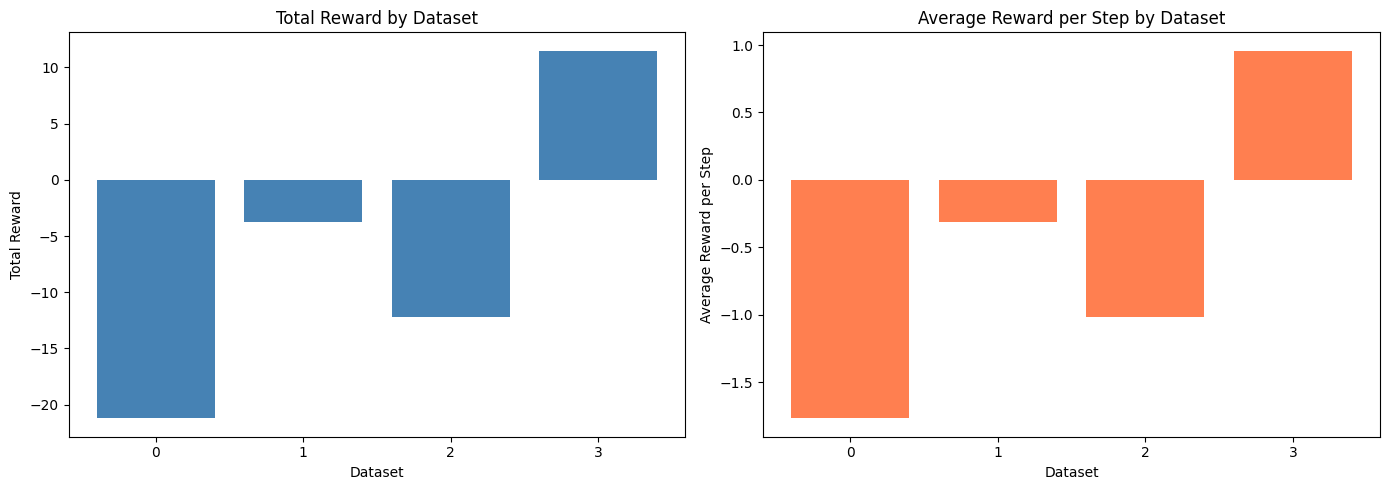

In [8]:
# Plot rewards by dataset
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Total rewards
axes[0].bar(results_df['dataset'], results_df['total_reward'], color='steelblue')
axes[0].set_xlabel('Dataset')
axes[0].set_ylabel('Total Reward')
axes[0].set_title('Total Reward by Dataset')
axes[0].set_xticks(results_df['dataset'])

# Average rewards per step
axes[1].bar(results_df['dataset'], results_df['avg_reward'], color='coral')
axes[1].set_xlabel('Dataset')
axes[1].set_ylabel('Average Reward per Step')
axes[1].set_title('Average Reward per Step by Dataset')
axes[1].set_xticks(results_df['dataset'])

plt.tight_layout()
plt.show()
